In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.impute import SimpleImputer

#### Importing dataset

In [2]:
alzheimers_df = pd.read_csv(".\oasis_longitudinal.csv").drop(columns=["Subject ID", "MRI ID", "Hand"], axis=1)
alzheimers_df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
alzheimers_df.nunique()

Group         3
Visit         5
MR Delay    201
M/F           2
Age          39
EDUC         12
SES           5
MMSE         18
CDR           4
eTIV        286
nWBV        136
ASF         265
dtype: int64

#### Counting missing values

In [4]:
alzheimers_df.isna().sum()[alzheimers_df.isna().sum().apply(lambda count: count > 0)]

SES     19
MMSE     2
dtype: int64

Now with missing values:
* We could decide to **drop** the samples with missing values, although this isn't recommended
* We could decide to fill in the missing values with a **unique seperate value** in each feature that has missing values
* Could use **SimpleImputer** from Scikit-learn. Which essentially just fills in the missing values in feature with the feature's own mean/median/mode/constant value

##### SES

In [5]:
alzheimers_df['SES'].unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

In [6]:
# for SES, let's fill in the missing values with a constant unique value of 0
ses_imputer =  SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
alzheimers_df['SES'] = ses_imputer.fit_transform(np.array(alzheimers_df['SES']).reshape(-1, 1))
print("missing values after imputation in SES ->", alzheimers_df['SES'].isna().sum())

missing values after imputation in SES -> 0


##### MMSE

In [7]:
alzheimers_df['MMSE'].unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18., nan])

In [8]:
alzheimers_df['MMSE'].nunique()

18

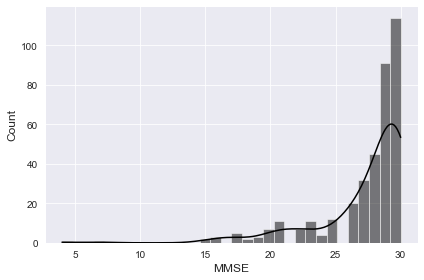

In [9]:
sns.histplot(alzheimers_df['MMSE'], kde=True, color='black')
plt.tight_layout()
plt.show()

In [10]:
# for MMSE, let's fill in the missing values with a modal value of the feature
mmse_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
alzheimers_df['MMSE'] = mmse_imputer.fit_transform(alzheimers_df['MMSE'].to_numpy().reshape(-1, 1))
print("missing values after imputation in MMSE ->", alzheimers_df['MMSE'].isna().sum())

missing values after imputation in MMSE -> 0


In [11]:
alzheimers_df.isna().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

#### Distribution of object type features

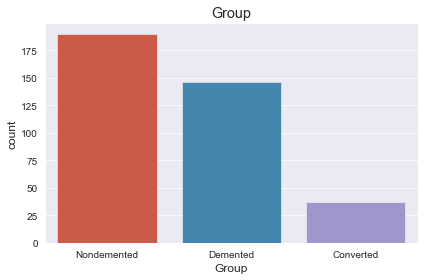

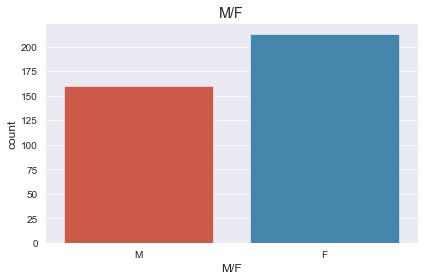

In [12]:
alzheimers_df_objects = alzheimers_df.columns[alzheimers_df.dtypes.apply(lambda x: x == 'O')]
for object_feature in alzheimers_df_objects:
    sns.countplot(x=alzheimers_df[object_feature])
    plt.title(object_feature)
    plt.tight_layout()
    plt.show()

#### Distribution of numerical type features

In [13]:
alzheimers_df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [14]:
alzheimers_df_numericals = alzheimers_df.select_dtypes(include=['int', 'float'])
alzheimers_df_numericals.columns

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')

##### Trying to seperate between discrete and continuous numerical features

In [15]:
alzheimers_df_numericals.nunique()

Visit         5
MR Delay    201
Age          39
EDUC         12
SES           6
MMSE         18
CDR           4
eTIV        286
nWBV        136
ASF         265
dtype: int64

Let's use **15** as the threshold to seperete discrete from continuous features

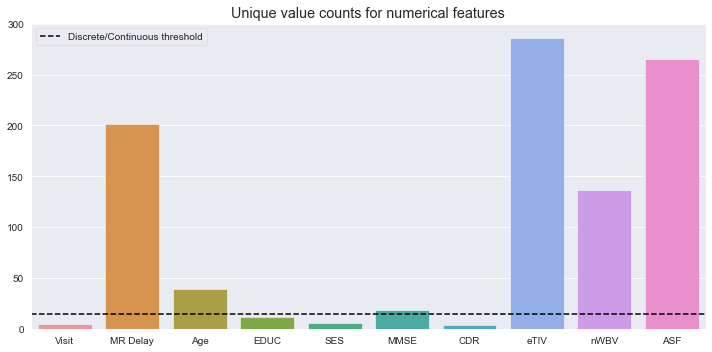

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=alzheimers_df_numericals.nunique().keys(), y=alzheimers_df_numericals.nunique().values)
plt.axhline(15, color='black', linestyle='--', label='Discrete/Continuous threshold')
plt.title('Unique value counts for numerical features')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
discrete_columns = alzheimers_df_numericals.columns[alzheimers_df_numericals.nunique().apply(lambda x: x < 15)]
continuous_columns = [col for col in alzheimers_df_numericals.columns if col not in discrete_columns]
print("Discrete columns ->", *discrete_columns)
print("Continuous columns ->", *continuous_columns)

Discrete columns -> Visit EDUC SES CDR
Continuous columns -> MR Delay Age MMSE eTIV nWBV ASF


##### Looking at distribution on continuous numerical features 

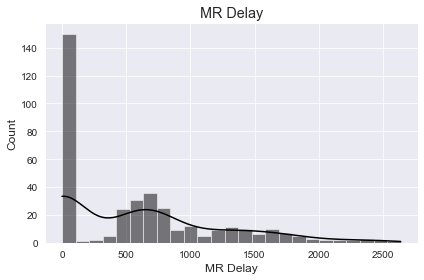

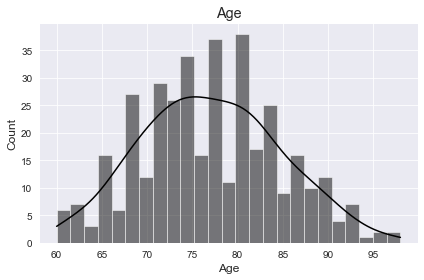

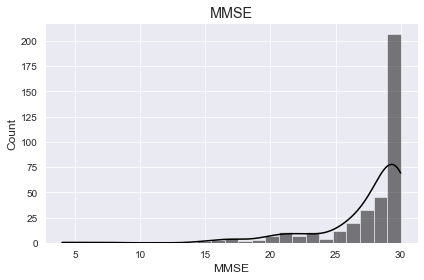

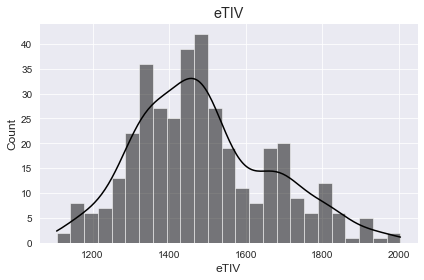

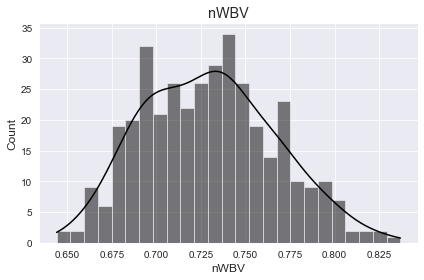

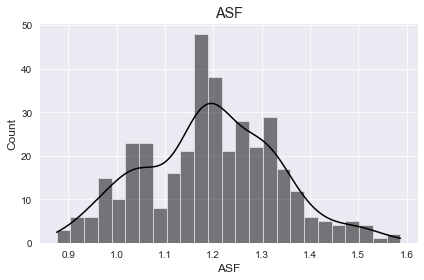

In [18]:
for continuous in continuous_columns:
    sns.histplot(alzheimers_df[continuous], bins=25, color='black', kde=True)
    plt.title(continuous)
    plt.tight_layout()
    plt.show()

##### Distribution for discrete numerical values with Group output feature

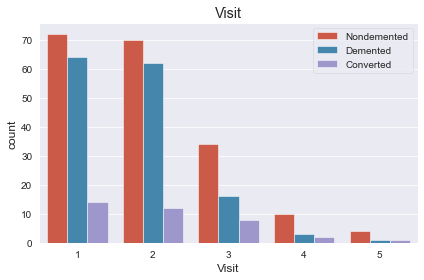

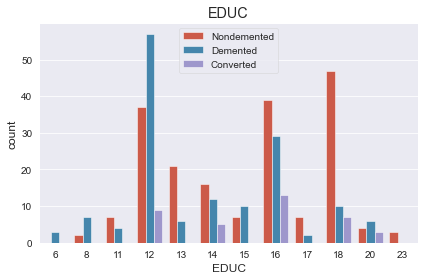

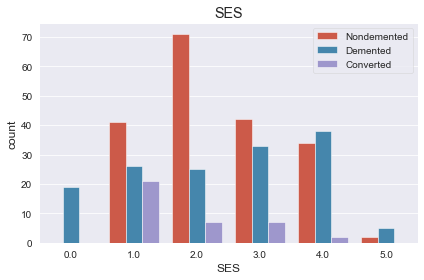

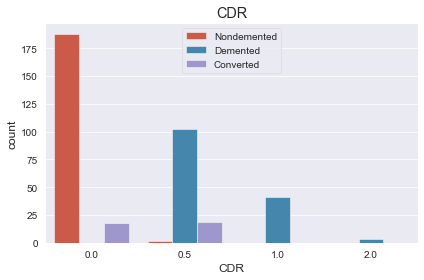

In [19]:
for discrete in discrete_columns:
    sns.countplot(x=alzheimers_df[discrete], hue='Group', data=alzheimers_df)
    plt.title(discrete)
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()